In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings(action='ignore')

# 기본 시각화 라이브러리
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns

'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


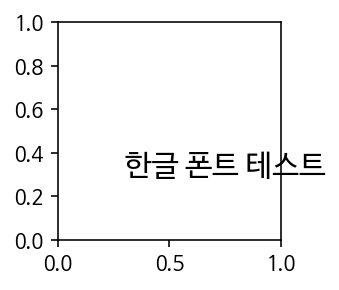

In [2]:
# 그래프 한글 폰트 설정 (한번 돌린 후 런타임 다시시작하고 다시 돌려야 제대로 나옴)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

from IPython.display import set_matplotlib_formats
#폰트 선명하게 보이게 하기 위해
set_matplotlib_formats('retina')

## Test
plt.figure(figsize=(2,2))
plt.text(0.3, 0.3, '한글 폰트 테스트', size=15)
plt.show()

## 사용 데이터
* 서울특별시 세탁업 인허가 정보
http://data.seoul.go.kr/dataList/OA-16065/S/1/datasetView.do
* 서울시 코로나
http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do
* 서울시 우리마을가게 상권분석서비스(상권-추정매출)
http://data.seoul.go.kr/dataList/OA-15572/S/1/datasetView.do

In [4]:
seoul_lan=pd.read_csv('서울특별시 세탁업 인허가 정보_시도 구분.csv', encoding='cp949')
seoul_lan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   개방자치단체코드   15072 non-null  int64  
 1   관리번호       15072 non-null  object 
 2   인허가일자      15072 non-null  int64  
 3   인허가취소일자    0 non-null      float64
 4   영업상태코드     15072 non-null  int64  
 5   영업상태명      15072 non-null  object 
 6   상세영업상태코드   15072 non-null  int64  
 7   상세영업상태명    15072 non-null  object 
 8   폐업일자       10882 non-null  float64
 9   휴업시작일자     0 non-null      float64
 10  휴업종료일자     0 non-null      float64
 11  재개업일자      0 non-null      float64
 12  전화번호       13832 non-null  object 
 13  소재지면적      15056 non-null  float64
 14  소재지우편번호    15058 non-null  float64
 15  지번주소_시     15061 non-null  object 
 16  지번주소_도     15060 non-null  object 
 17  지번주소_동     15060 non-null  object 
 18  도로명주소      7470 non-null   object 
 19  도로명우편번호    7296 non-null   float64
 20  사업장명  

In [5]:
lan=seoul_lan[['인허가일자','상세영업상태코드','상세영업상태명','폐업일자','지번주소_시','지번주소_도','지번주소_동','도로명주소','사업장명','업태구분명','위생업태명']]
lan.head()

,인허가일자,상세영업상태코드,상세영업상태명,폐업일자,지번주소_시,지번주소_도,지번주소_동,도로명주소,사업장명,업태구분명,위생업태명
0,20130218,1,영업,NaN,서울특별시,성북구,하월곡동,서울특별시 성북구 오패산로5길 9-12 (하월곡동),크린에이드강북지사,일반세탁업,NaN
1,20050627,2,폐업,20201015.0,서울특별시,강서구,오쇠동,서울특별시 강서구 오정로 443-25 (오쇠동),비상 크리닝,일반세탁업,NaN
2,20201221,1,영업,NaN,서울특별시,광진구,구의동,서울특별시 광진구 천호대로134길 31 1층 (구의동),백조사,일반세탁업,NaN
3,19871102,2,폐업,20210125.0,서울특별시,강동구,천호동,서울특별시 강동구 천중로 79 (천호동),현대사,일반세탁업,NaN
4,20210129,1,영업,NaN,서울특별시,강남구,신사동,서울특별시 강남구 언주로174길 19 마론빌딩 1층 (신사동),닥터데이빗,일반세탁업,NaN


In [6]:
lan.rename(columns={'지번주소_시':'시도구분','지번주소_도':'지역구','지번주소_동':'행정동'},inplace=True)

In [9]:
lan_oc=lan.groupby(['지역구','상세영업상태명'])['업태구분명'].count().to_frame().reset_index()
lan_oc.rename(columns={'업태구분명':'count'},inplace=True)
lan_o=lan_oc[lan_oc['상세영업상태명']=='영업']
lan_c=lan_oc[lan_oc['상세영업상태명']=='폐업']

In [10]:
lan_o.sort_values(by='count',ascending=False).head(8)

,지역구,상세영업상태명,count
0,강남구,영업,312
34,송파구,영업,266
8,관악구,영업,231
6,강서구,영업,218
28,서초구,영업,197
42,은평구,영업,193
2,강동구,영업,185
32,성북구,영업,184


In [11]:
lan_c.sort_values(by='count',ascending=False).head(8)

,지역구,상세영업상태명,count
35,송파구,폐업,844
33,성북구,폐업,656
1,강남구,폐업,637
3,강동구,폐업,581
9,관악구,폐업,574
37,양천구,폐업,540
43,은평구,폐업,510
27,서대문구,폐업,483


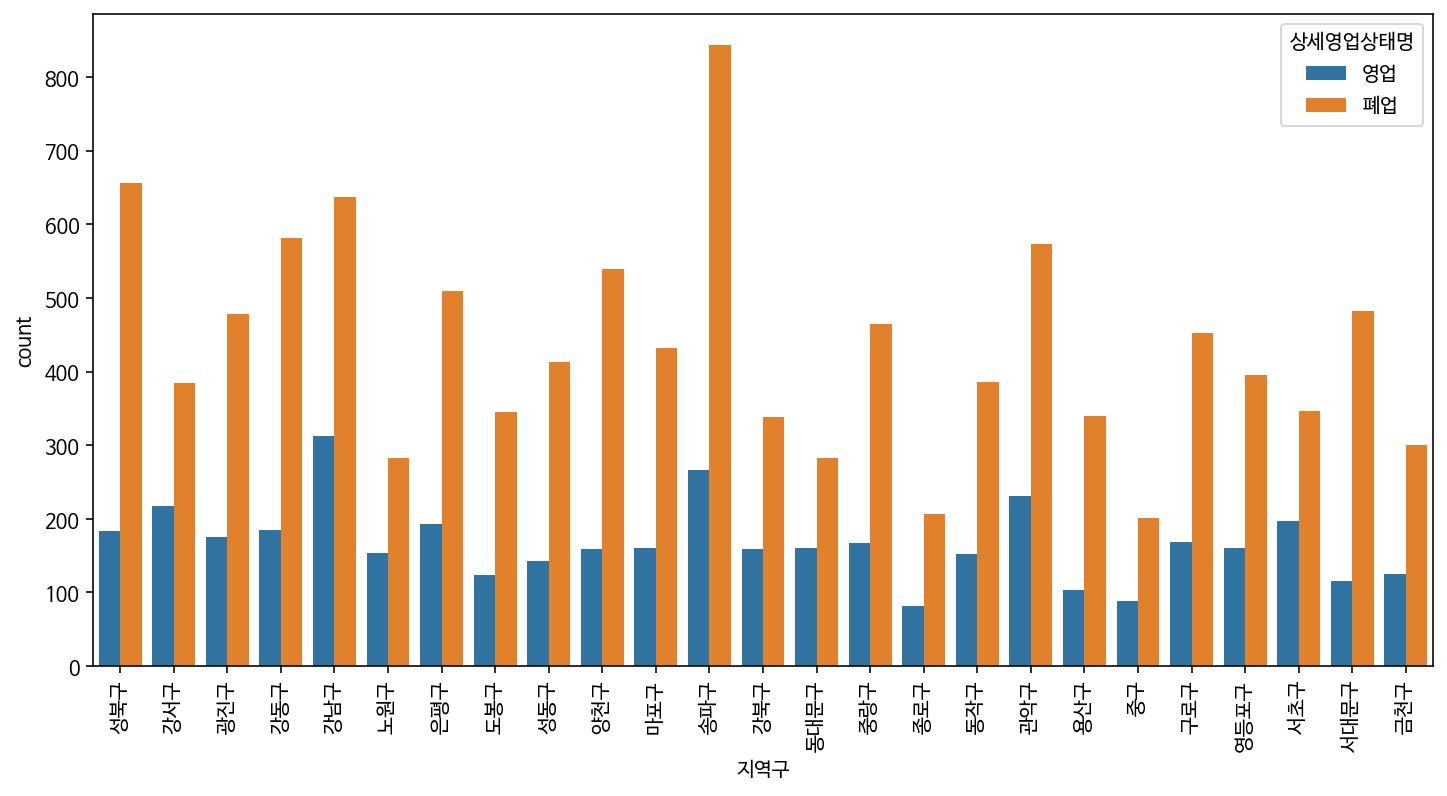

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='지역구',hue='상세영업상태명',data=lan)
plt.xticks(rotation=90)
plt.show()

In [14]:
corona=pd.read_csv('서울시 코로나19 확진자 현황.csv', encoding = 'cp949')
corona['확진일']=pd.to_datetime(corona['확진일'],format='%Y-%m-%d')
corona['등록일']=pd.to_datetime(corona['등록일'])
corona['수정일']=pd.to_datetime(corona['수정일'])
corona.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,127874,2021-11-09,NaN,NaN,NaN,강동구,NaN,감염경로 조사중,NaN,-,NaN,2021-11-10 09:49:00,2021-11-10 09:49:00,Y
1,127873,2021-11-09,NaN,NaN,NaN,서대문구,NaN,감염경로 조사중,NaN,-,NaN,2021-11-10 09:49:00,2021-11-10 09:49:00,Y
2,127872,2021-11-09,NaN,NaN,NaN,용산구,NaN,감염경로 조사중,NaN,-,NaN,2021-11-10 09:49:00,2021-11-10 09:49:00,Y
3,127871,2021-11-09,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,-,NaN,2021-11-10 09:49:00,2021-11-10 09:49:00,Y
4,127870,2021-11-09,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,-,NaN,2021-11-10 09:49:00,2021-11-10 09:49:00,Y


In [15]:
corona.sort_values(by='연번').head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
127873,1,2020-01-24,NaN,NaN,NaN,강서구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08:00,2021-05-27 11:08:00,Y
127872,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08:00,2021-05-27 11:08:00,Y
127871,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08:00,2021-05-27 11:08:00,Y
127870,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08:00,2021-05-27 11:08:00,Y
127869,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08:00,2021-05-27 11:08:00,Y


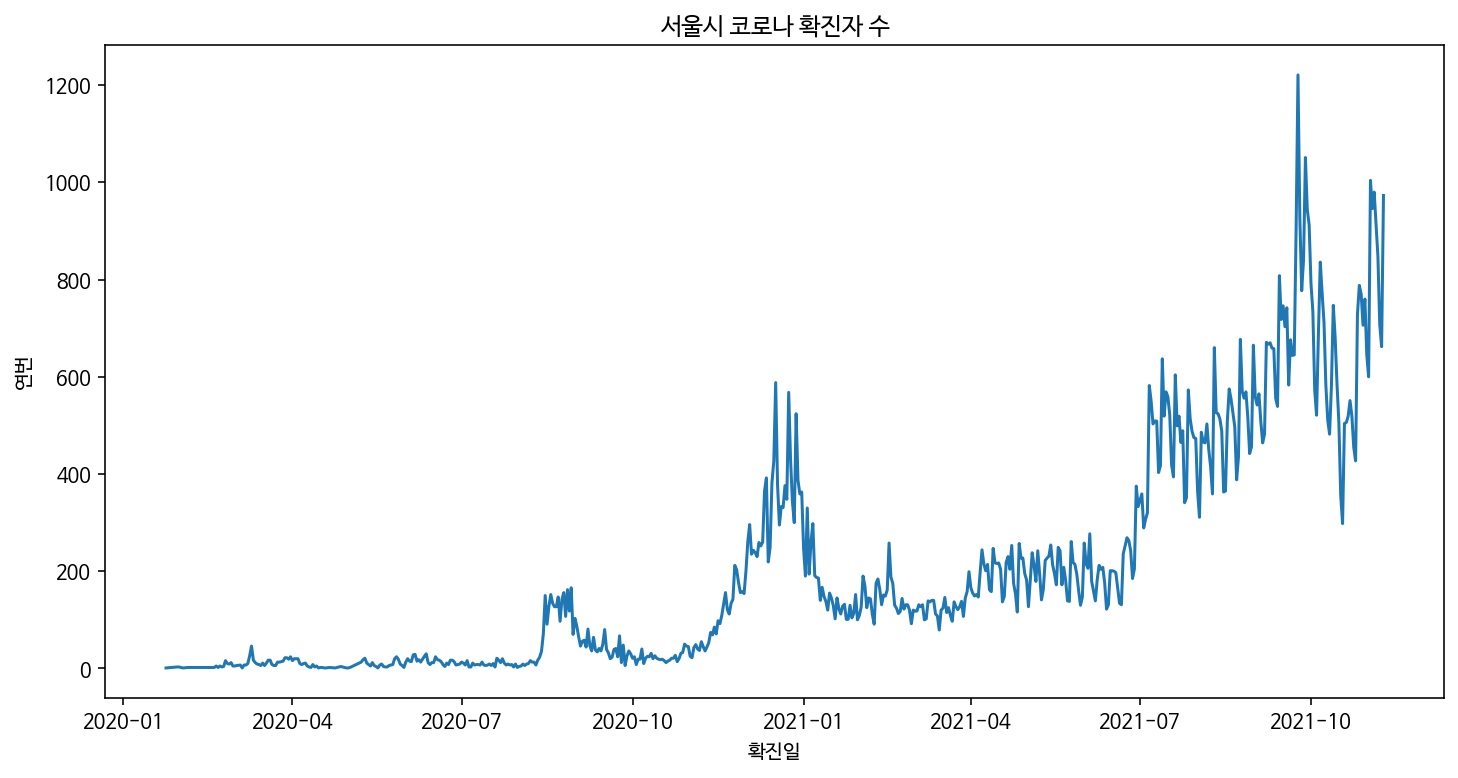

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(x='확진일',y='연번',data=corona.groupby('확진일').count().reset_index())
plt.title('서울시 코로나 확진자 수')
plt.show()

In [17]:
corona['확진월']=corona['확진일'].dt.month
corona.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,확진월
0,127874,2021-11-09,NaN,NaN,NaN,강동구,NaN,감염경로 조사중,NaN,-,NaN,2021-11-10 09:49:00,2021-11-10 09:49:00,Y,11
1,127873,2021-11-09,NaN,NaN,NaN,서대문구,NaN,감염경로 조사중,NaN,-,NaN,2021-11-10 09:49:00,2021-11-10 09:49:00,Y,11
2,127872,2021-11-09,NaN,NaN,NaN,용산구,NaN,감염경로 조사중,NaN,-,NaN,2021-11-10 09:49:00,2021-11-10 09:49:00,Y,11
3,127871,2021-11-09,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,-,NaN,2021-11-10 09:49:00,2021-11-10 09:49:00,Y,11
4,127870,2021-11-09,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,-,NaN,2021-11-10 09:49:00,2021-11-10 09:49:00,Y,11


In [19]:
co_allcount=corona.groupby(['지역'])['연번'].count().to_frame().reset_index()
co_allcount.rename(columns={'연번':'확진자수'},inplace=True)
co_allcount.sort_values(by='확진자수',ascending=False).head()

,지역,확진자수
0,강남구,8215
18,송파구,7958
4,관악구,6742
6,구로구,6337
26,타시도,6245


### 코로나 월별 확진자 추이

In [20]:
corona_temp=pd.read_csv('서울시 코로나19 확진자 현황.csv', encoding = 'cp949')
corona_temp['확진일']=corona_temp['확진일'].str[:7]
corona_df=corona_temp.groupby('확진일')['연번'].count().to_frame().reset_index()
corona_df.rename(columns={'연번':'확진자수'},inplace=True)
corona_df.head()

,확진일,확진자수
0,2020-01,7
1,2020-02,80
2,2020-03,391
3,2020-04,156
4,2020-05,229


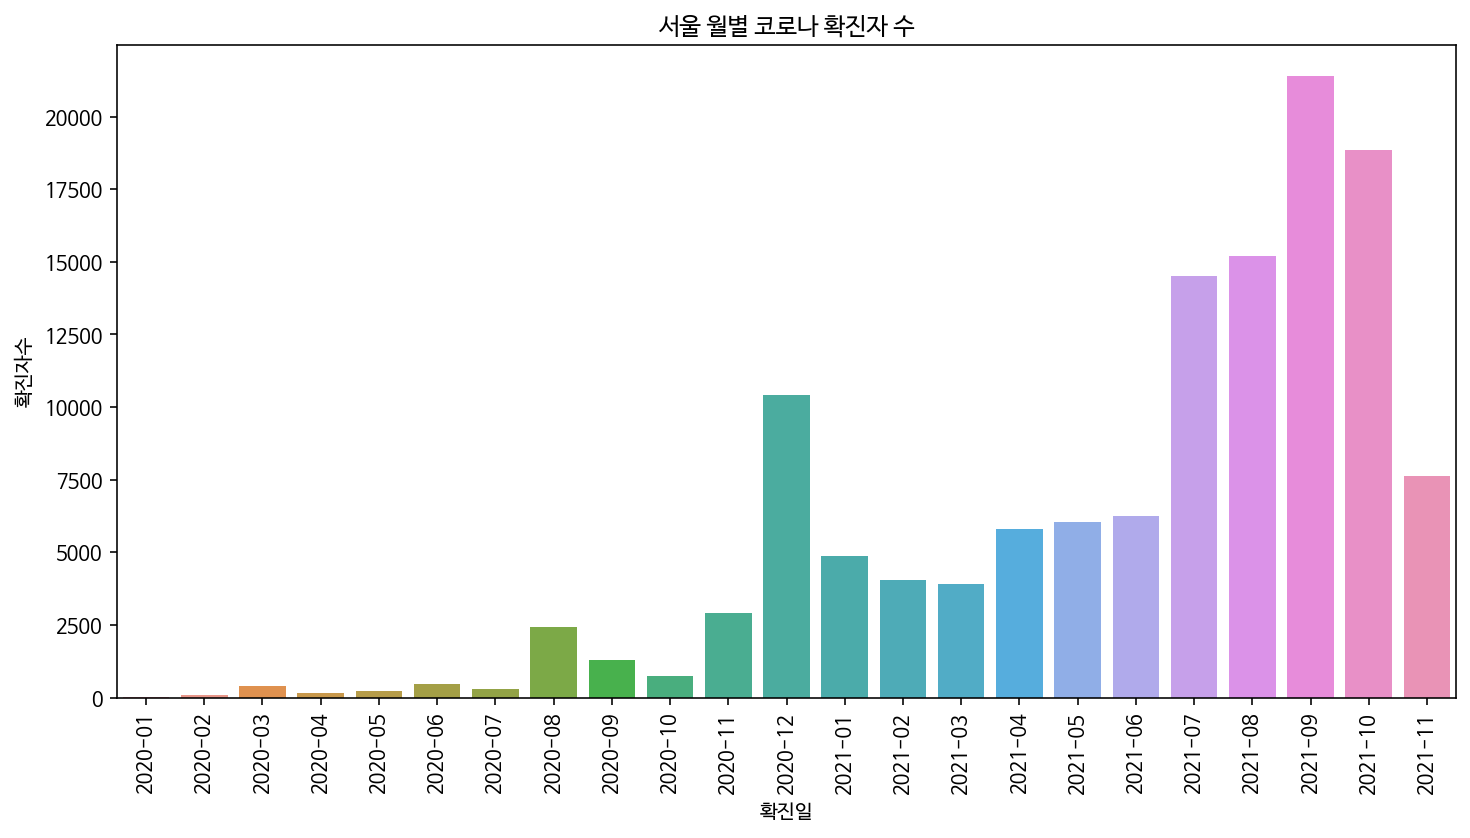

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x='확진일',y='확진자수',data=corona_df)
plt.xticks(rotation=90)
plt.title('서울 월별 코로나 확진자 수')
plt.show()

In [22]:
# 폐업데이터 2020-2021
new_lan=pd.read_csv('newdf.csv',encoding='cp949')
new_lan.head()

,Unnamed: 0,지번주소_시,지번주소_도,지번주소_동,사업장명,상세영업상태명,상세영업상태코드,영업상태명,영업상태코드,폐업일자,a1,a2,a3,date
0,2,서울특별시,강서구,오쇠동,비상 크리닝,폐업,2,폐업,3,20201015,2020,10,15,2020-10-15
1,4,서울특별시,강동구,천호동,현대사,폐업,2,폐업,3,20210125,2021,1,25,2021-01-25
2,6,서울특별시,노원구,월계동,청미세탁,폐업,2,폐업,3,20200917,2020,9,17,2020-09-17
3,10,서울특별시,도봉구,방학동,청구세탁소,폐업,2,폐업,3,20210830,2021,8,30,2021-08-30
4,11,서울특별시,양천구,신월동,은혜명품세탁,폐업,2,폐업,3,20201016,2020,10,16,2020-10-16


In [23]:
# 폐업데이터 전처리
new_lan_reg=new_lan[['지번주소_도','지번주소_동','사업장명','상세영업상태명','date']]
new_lan_reg.rename(columns={'지번주소_도':'지역구','지번주소_동':'행정동'},inplace=True)
new_lan_reg['date']=pd.to_datetime(new_lan_reg['date'],format='%Y-%m-%d')
new_lan_reg.head()

,지역구,행정동,사업장명,상세영업상태명,date
0,강서구,오쇠동,비상 크리닝,폐업,2020-10-15
1,강동구,천호동,현대사,폐업,2021-01-25
2,노원구,월계동,청미세탁,폐업,2020-09-17
3,도봉구,방학동,청구세탁소,폐업,2021-08-30
4,양천구,신월동,은혜명품세탁,폐업,2020-10-16


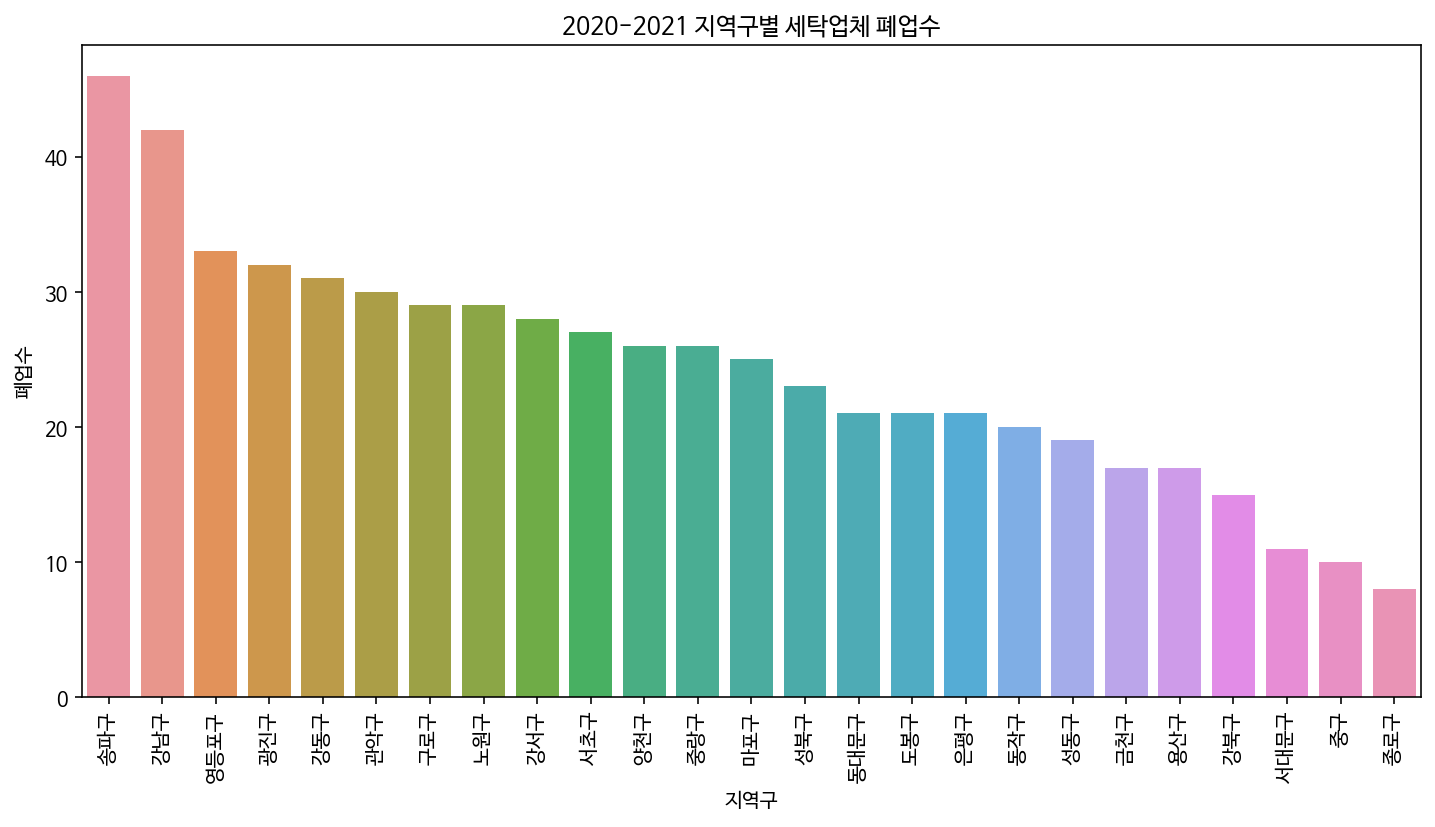

In [26]:
new_lan_count=new_lan_reg.groupby('지역구')['상세영업상태명'].count().to_frame().reset_index()
new_lan_count.rename(columns={'상세영업상태명':'폐업수'},inplace=True)
new_lan_count.sort_values(by='폐업수',ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x='지역구',y='폐업수',data=new_lan_count)
plt.xticks(rotation=90)
plt.title('2020-2021 지역구별 세탁업체 폐업수')
plt.show()

In [27]:
lan_reg_pic=new_lan[['지번주소_도','지번주소_동','사업장명','상세영업상태명','date']]
lan_reg_pic.rename(columns={'지번주소_도':'지역구','지번주소_동':'행정동'},inplace=True)
lan_reg_pic['date']=lan_reg_pic['date'].str[:7]
lan_reg_pic.head()

,지역구,행정동,사업장명,상세영업상태명,date
0,강서구,오쇠동,비상 크리닝,폐업,2020-10
1,강동구,천호동,현대사,폐업,2021-01
2,노원구,월계동,청미세탁,폐업,2020-09
3,도봉구,방학동,청구세탁소,폐업,2021-08
4,양천구,신월동,은혜명품세탁,폐업,2020-10


In [28]:
temp_lan=lan_reg_pic.groupby('date')['상세영업상태명'].count().to_frame().reset_index()
temp_lan.rename(columns={'상세영업상태명':'폐업수'},inplace=True)
temp_lan.head()

,date,폐업수
0,2020-01,22
1,2020-02,21
2,2020-03,48
3,2020-04,21
4,2020-05,29


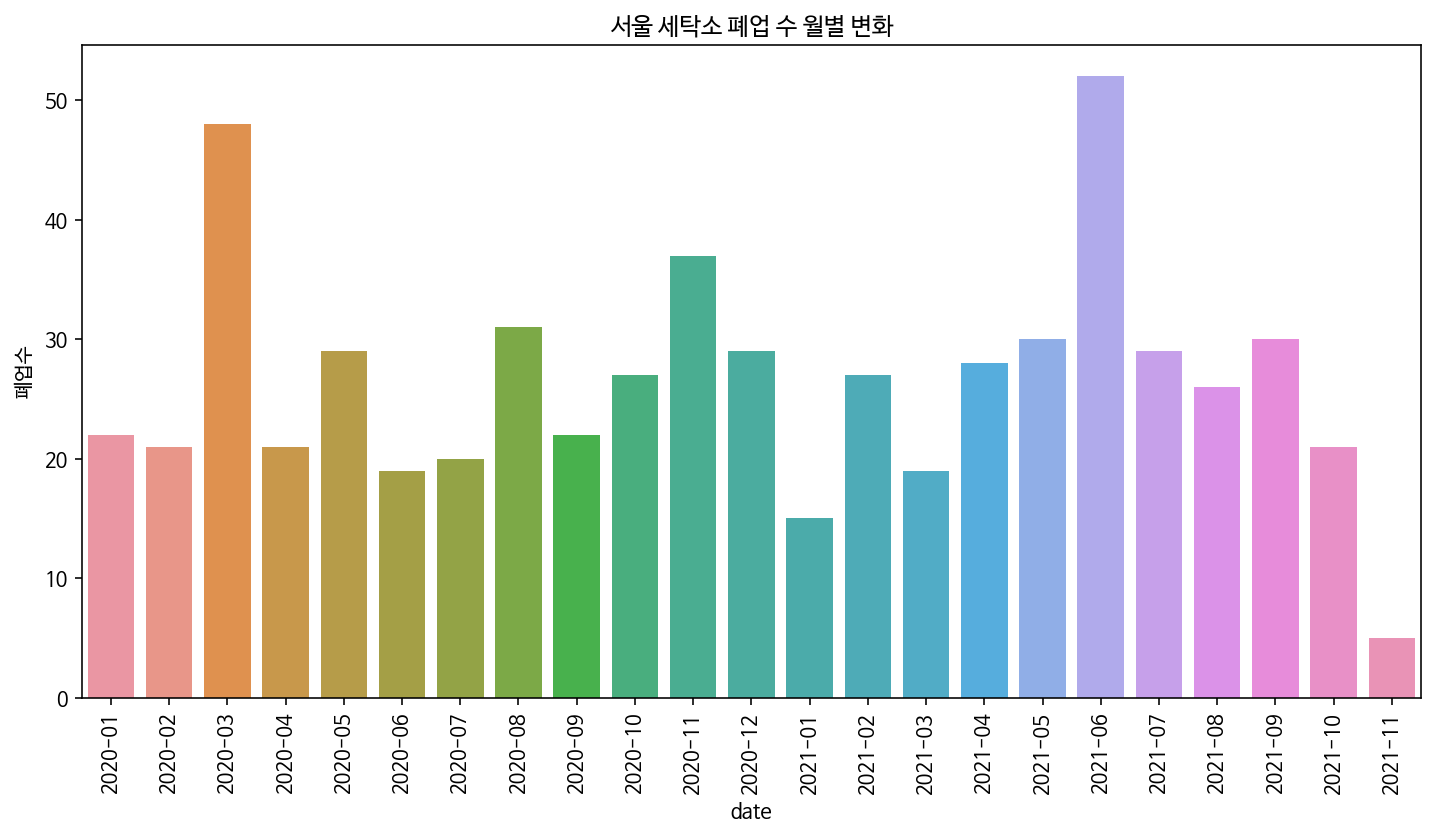

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x='date',y='폐업수',data=temp_lan)
plt.xticks(rotation=90)
plt.title('서울 세탁소 폐업 수 월별 변화')
plt.show()

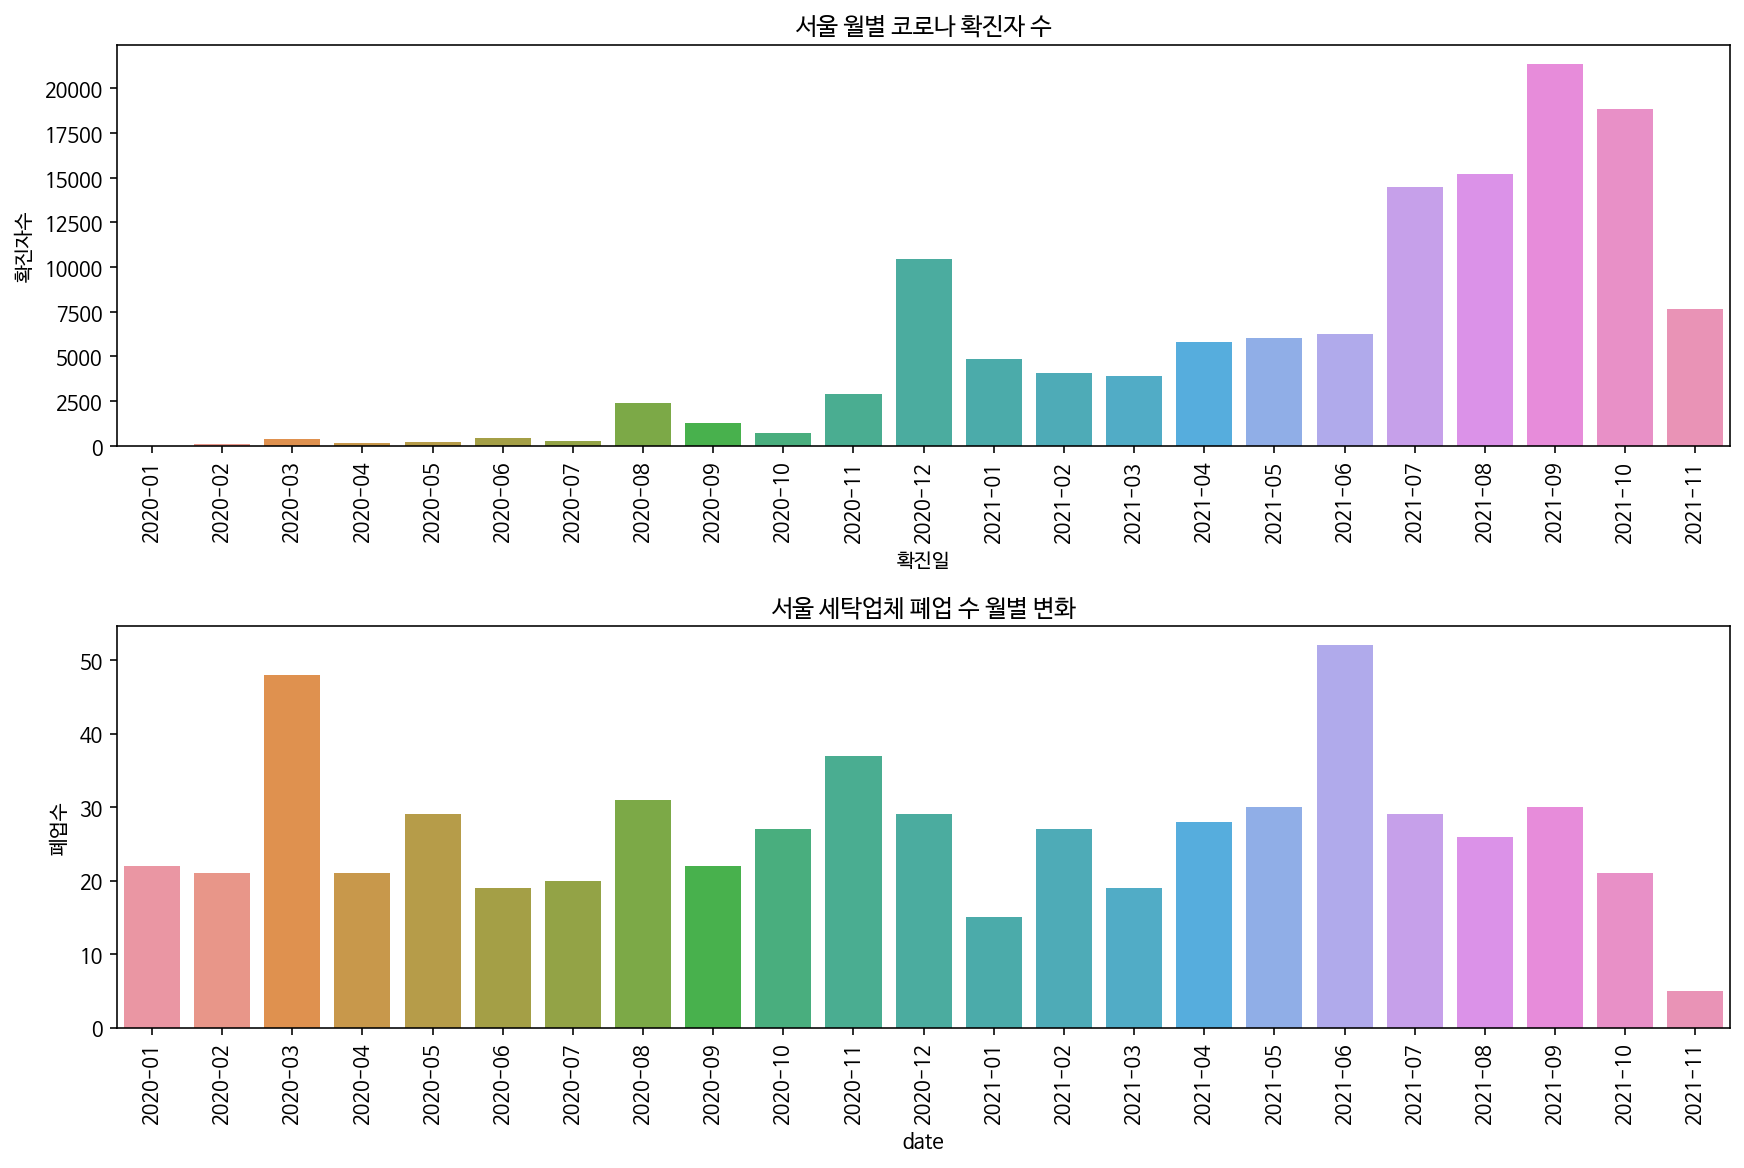

In [30]:
fig, ax= plt.subplots(figsize=(12,8),nrows=2, constrained_layout=True)
plot1= sns.barplot(x='확진일',y='확진자수',data=corona_df, ax=ax[0])
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

plot2= sns.barplot(x='date',y='폐업수',data=temp_lan,ax=ax[1])
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90)

ax[0].set_title('서울 월별 코로나 확진자 수')
ax[1].set_title('서울 세탁업체 폐업 수 월별 변화')

plt.show()

In [31]:
new_reg=new_lan_reg.groupby(['지역구','date'])['상세영업상태명'].count().to_frame().reset_index()
new_reg.rename(columns={'상세영업상태명':'폐업수'},inplace=True)
new_reg.head()

,지역구,date,폐업수
0,강남구,2020-01-16,1
1,강남구,2020-01-21,1
2,강남구,2020-02-14,1
3,강남구,2020-03-05,1
4,강남구,2020-03-16,1


In [32]:
new_lan_gj=new_lan[['지번주소_도','지번주소_동','사업장명','상세영업상태명','date']]
new_lan_gj.rename(columns={'지번주소_도':'지역구','지번주소_동':'행정동'},inplace=True)
new_lan_gj['date']=new_lan_gj['date'].str[:7]
lan_gj=new_lan_gj[(new_lan_gj['지역구']=='강남구')|(new_lan_gj['지역구']=='중구')]
lan_gj=lan_gj[lan_gj['date']!='2021-11']
lan_gj.head()

,지역구,행정동,사업장명,상세영업상태명,date
7,강남구,삼성동,행복세탁,폐업,2021-02
15,중구,신당동,꽃재세탁,폐업,2020-05
24,중구,회현동2가,중앙세탁소,폐업,2020-02
25,중구,장충동2가,대한사,폐업,2020-04
27,중구,만리동1가,빨래방(서부역점),폐업,2021-06


In [33]:
gj_df=lan_gj.groupby(['지역구','date'])['상세영업상태명'].count().to_frame().reset_index()
gj_df.rename(columns={'상세영업상태명':'폐업수'},inplace=True)
gangnam=gj_df[gj_df['지역구']=='강남구']
jung=gj_df[gj_df['지역구']=='중구']


In [34]:
gangnam.to_csv('강남구월별폐업.csv',encoding='utf-8-sig')
jung.to_csv('중구월별폐업.csv',encoding='utf-8-sig')

## 세탁소 폐업 전체 기간

In [35]:
land=pd.read_csv('원본데이터날짜변환.csv',encoding='cp949')
land_1=land[['지번주소_도','지번주소_동','사업장명','상세영업상태명','date','a1','a2','a3']]
land_1.rename(columns={'지번주소_도':'자치구','지번주소_동':'행정동','a1':'year','a2':'month','a3':'day'},inplace=True)
land_temp=land_1[(land_1['year']==2018)|(land_1['year']==2019)|(land_1['year']==2020)|(land_1['year']==2021)]
land_temp.head()

,자치구,행정동,사업장명,상세영업상태명,date,year,month,day
0,강서구,오쇠동,비상 크리닝,폐업,2020-10-15,2020,10,15
1,강동구,천호동,현대사,폐업,2021-01-25,2021,1,25
2,노원구,월계동,청미세탁,폐업,2020-09-17,2020,9,17
3,도봉구,방학동,청구세탁소,폐업,2021-08-30,2021,8,30
4,양천구,신월동,은혜명품세탁,폐업,2020-10-16,2020,10,16


In [36]:
land_temp['date']=land_temp['date'].str[:7]
land_df=land_temp.groupby('date')['상세영업상태명'].count().to_frame().reset_index()
land_df.rename(columns={'상세영업상태명':'폐업수'},inplace=True)
land_df.head()

,date,폐업수
0,2018-01,33
1,2018-02,19
2,2018-03,30
3,2018-04,39
4,2018-05,41


In [38]:
land_df['폐업누적합']=land_df['폐업수'].cumsum()
land_df.head()

,date,폐업수,폐업누적합
0,2018-01,33,33
1,2018-02,19,52
2,2018-03,30,82
3,2018-04,39,121
4,2018-05,41,162


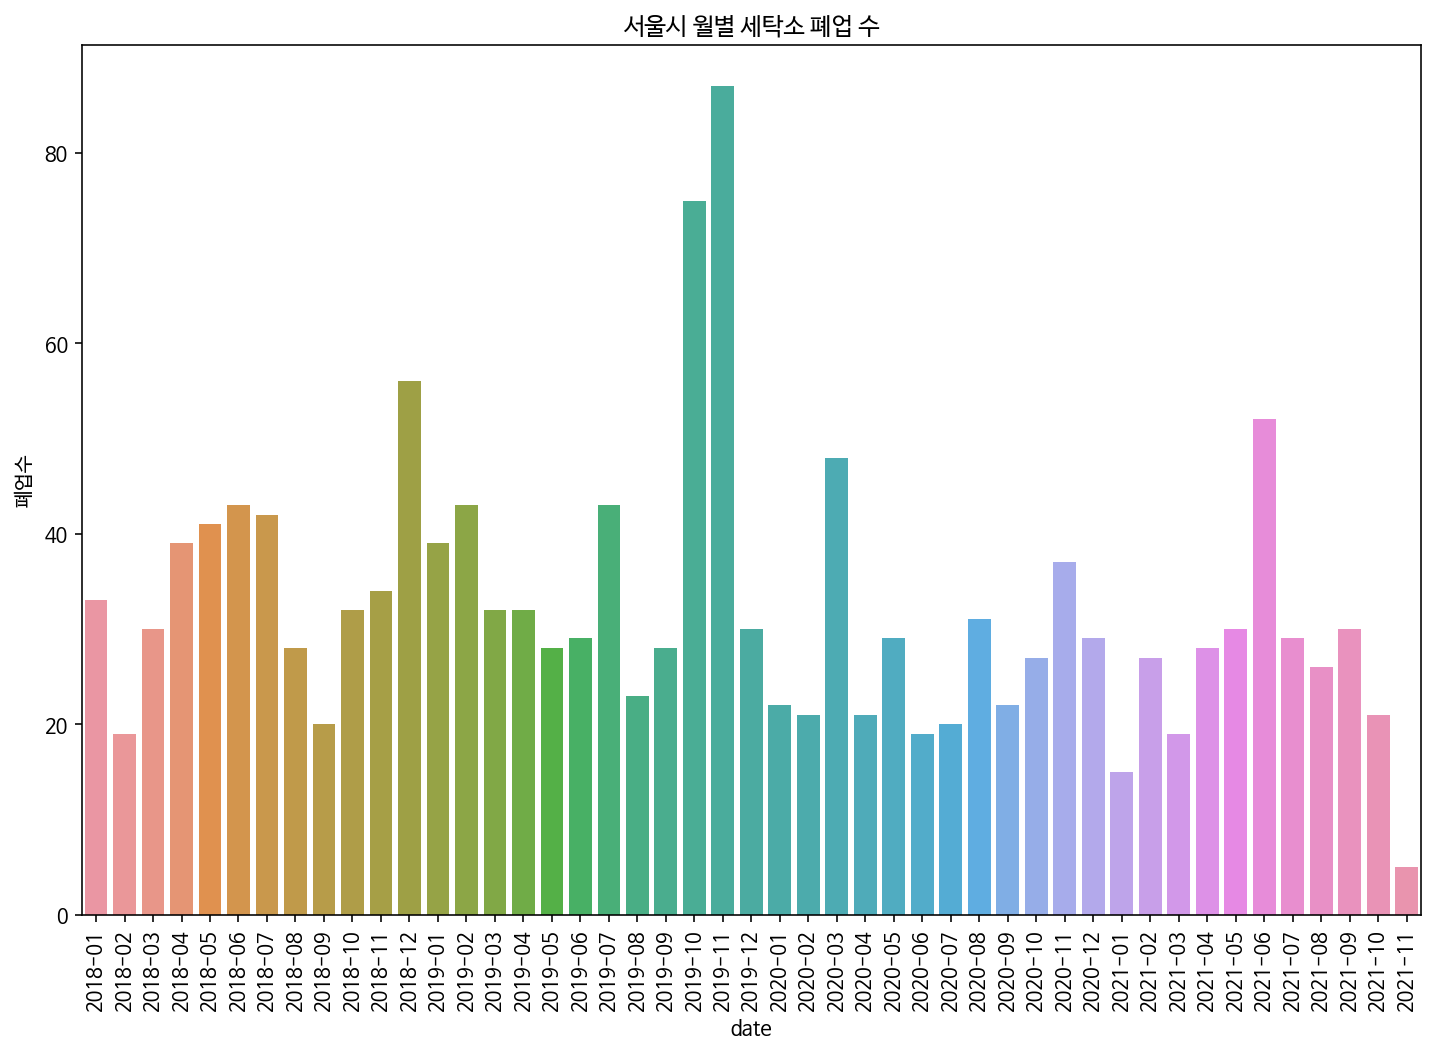

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x='date',y='폐업수',data=land_df)
plt.xticks(rotation=90)
plt.title('서울시 월별 세탁소 폐업 수')
plt.show()

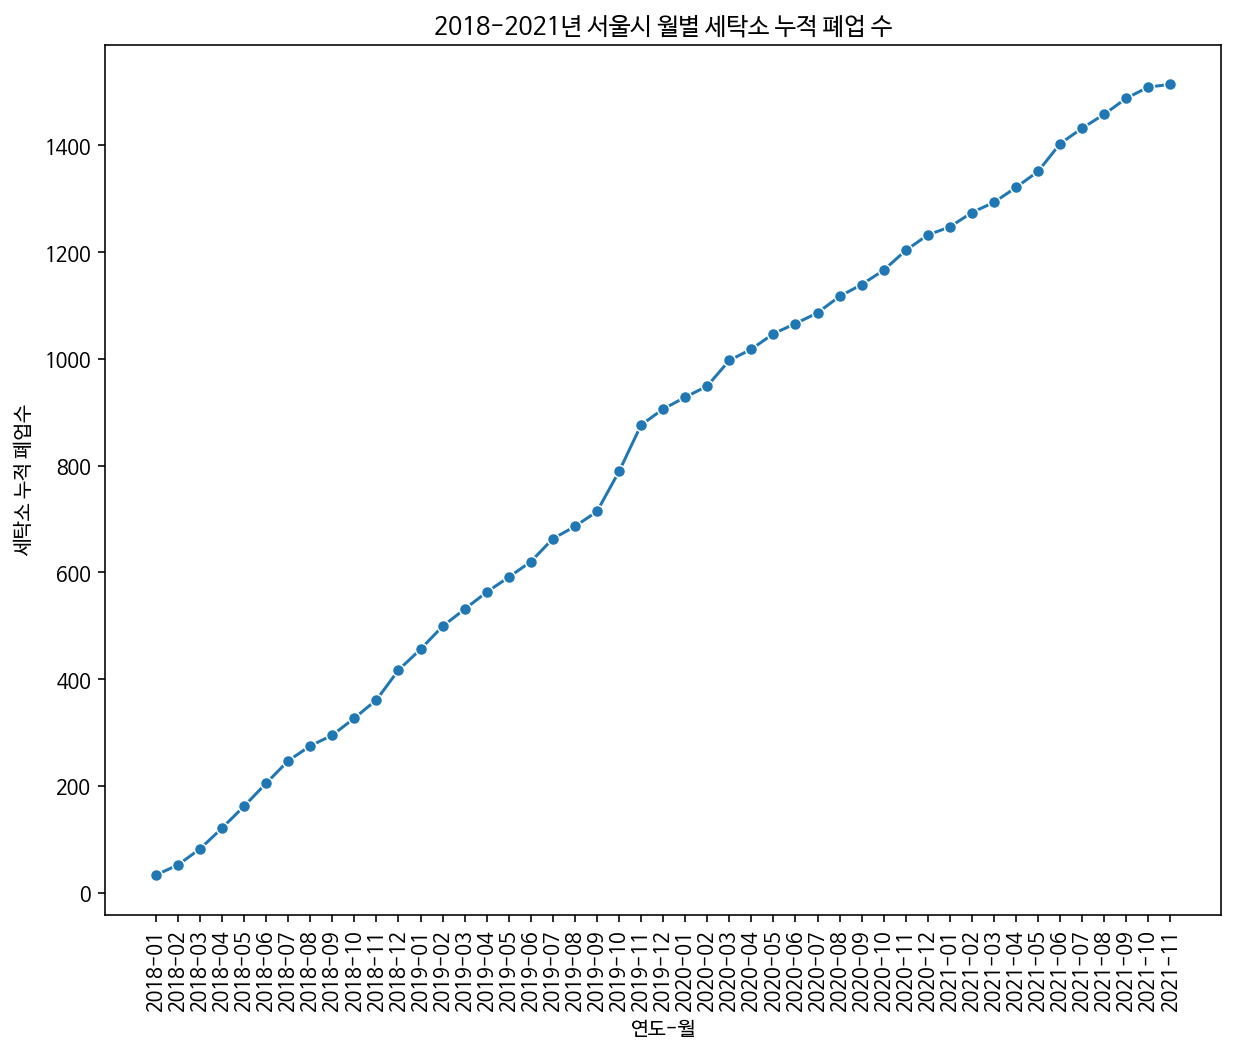

In [43]:
plt.figure(figsize=(10,8))
sns.lineplot(x='date',y='폐업누적합',data=land_df,marker='o',palette='YlGnBu')
plt.xticks(rotation=90)
plt.xlabel('연도-월')
plt.ylabel('세탁소 누적 폐업수')
plt.title('2018-2021년 서울시 월별 세탁소 누적 폐업 수')
plt.show()

In [21]:
corona_count=corona.groupby(['확진일','지역'])['연번'].count().to_frame().reset_index()
corona_count.rename(columns={'확진일':'date','지역':'지역구','연번':'코로나확진자수'},inplace=True)
corona_count.head()

,date,지역구,코로나확진자수
0,2020-01-24,강서구,1
1,2020-01-30,마포구,1
2,2020-01-30,종로구,1
3,2020-01-30,중랑구,1
4,2020-01-31,성북구,1


In [22]:
temp=pd.merge(corona_count,new_reg, on=('date','지역구'),how='inner')
temp.head()

,date,지역구,코로나확진자수,폐업수
0,2020-02-05,성북구,1,1
1,2020-02-25,송파구,4,1
2,2020-02-26,관악구,1,1
3,2020-03-05,강남구,1,1
4,2020-03-10,구로구,5,2


# t-test

In [21]:
from scipy.stats import f_oneway
import scipy.stats as stats

In [10]:
gan=pd.read_csv('강남구월별폐업.csv')
jung=pd.read_csv('중구월별폐업.csv')

In [11]:
gan.head()

,Unnamed: 0,지역구,date,폐업수
0,0,강남구,Jan-20,2
1,1,강남구,Feb-20,1
2,2,강남구,Mar-20,4
3,3,강남구,Apr-20,1
4,4,강남구,May-20,2


In [22]:
# 강남구 2020.01-2021.10 월별 세탁소 폐업수
gan1=[2,1,4,1,2,1,1,5,1,3,3,0,0,4,1,1,1,5,4,1,1,0]

# 중구 2020.01-2021.10 월별 세탁소 폐업수
jung1=[0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,2,2,0,1,0]

In [23]:
# 등분산성 확인
f_oneway(gan1,jung1)

# p-value(0.0003)가 매우 작으므로 두 데이터의 분산은 다르다. 

F_onewayResult(statistic=15.448275862068959, pvalue=0.000310915499370688)

In [25]:
# 이분산 가정 독립 2표본 검정 t-test
stats.ttest_ind(gan1,jung1,equal_var=False)

# p-value(0.0005)가 매우 작으므로 강남구 중구의 확진자 수에 따른 세탁소 폐업 수는 차이가 있다. 

Ttest_indResult(statistic=3.9304294755241402, pvalue=0.0005024250081980748)

# 서울시 우리마을가게 상권분석서비스 시각화(2017-2020)

In [44]:
mo16=pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2016.csv',encoding='cp949')
mo17=pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2017.csv',encoding='cp949')
mo18=pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018.csv',encoding='cp949')

In [45]:
molan16=mo16[mo16['서비스_업종_코드_명']=='세탁소']
molan17=mo17[mo17['서비스_업종_코드_명']=='세탁소']
molan18=mo18[mo18['서비스_업종_코드_명']=='세탁소']

In [5]:
molan17_all=molan17[['기준_년_코드','기준_분기_코드','상권_구분_코드_명','상권_코드_명','분기당_매출_금액','분기당_매출_건수','점포수']]
molan18_all=molan18[['기준_년_코드','기준_분기_코드','상권_구분_코드_명','상권_코드_명','분기당_매출_금액','분기당_매출_건수','점포수']]

In [6]:
mo19=pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv',encoding='cp949')

In [7]:
mo19.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [8]:
molan19=mo19[mo19['서비스_업종_코드_명']=='세탁소']

In [9]:
molan19_age=molan19[['기준_년_코드','기준_분기_코드','상권_코드_명','연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액','점포수']]
molan19_age.head()

,기준_년_코드,기준_분기_코드,상권_코드_명,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포수
123,2019,1,퇴계로56길,0,4944599,1942821,1992584,216144,0,2
124,2019,1,동일로242길,0,485714,5019047,0,8257144,1457143,3
185,2019,1,후암로28길,0,2486521,9284168,9250022,10200014,816130,2
233,2019,1,부일로11길,19564,479061,3522173,3260290,6768493,2032363,1
271,2019,1,능동로13길,1789120,63280968,30104535,8431718,13229081,3763722,5


In [10]:
temp_m19=molan19_age.groupby(['기준_년_코드','기준_분기_코드']).sum().reset_index()
temp_m19['연도_분기'] = temp_m19[['기준_년_코드','기준_분기_코드']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

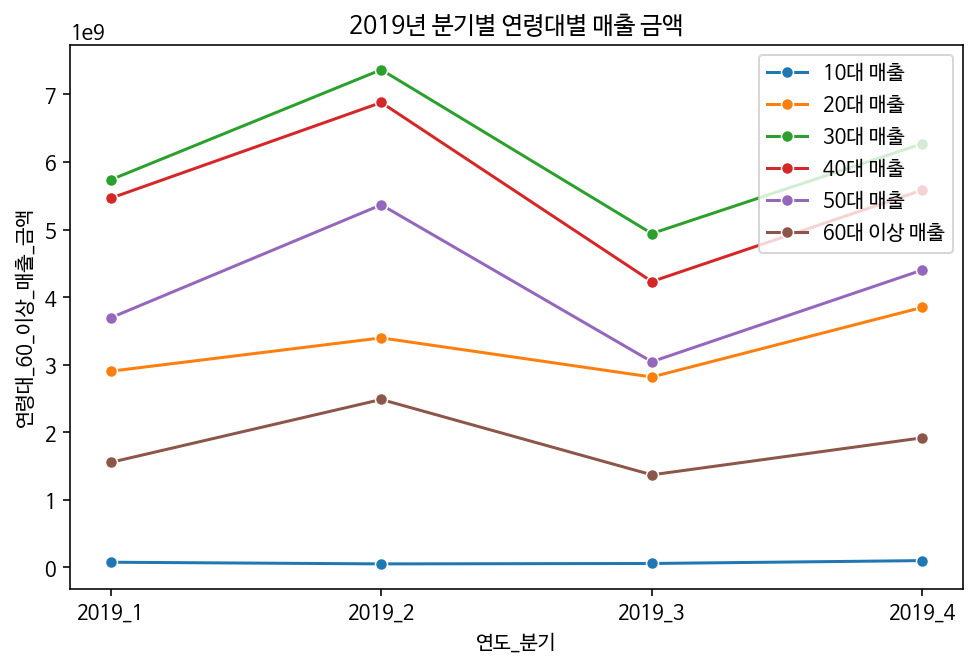

In [11]:
plt.figure(figsize=(8,5))
sns.lineplot(x='연도_분기',y='연령대_10_매출_금액',data=temp_m19, marker='o', label='10대 매출')
sns.lineplot(x='연도_분기',y='연령대_20_매출_금액',data=temp_m19, marker='o', label='20대 매출')
sns.lineplot(x='연도_분기',y='연령대_30_매출_금액',data=temp_m19, marker='o', label='30대 매출')
sns.lineplot(x='연도_분기',y='연령대_40_매출_금액',data=temp_m19, marker='o', label='40대 매출')
sns.lineplot(x='연도_분기',y='연령대_50_매출_금액',data=temp_m19, marker='o', label='50대 매출')
sns.lineplot(x='연도_분기',y='연령대_60_이상_매출_금액',data=temp_m19, marker='o', label='60대 이상 매출')
plt.title('2019년 분기별 연령대별 매출 금액')
plt.legend(loc='upper right')
plt.show()

In [12]:
mo20=pd.read_csv('서울시우리마을가게상권분석서비스(상권-추정매출)_2020.csv',encoding='cp949')

In [13]:
molan20=mo20[mo20['서비스_업종_코드_명']=='세탁소']

In [46]:
molan=pd.concat([molan16,molan17,molan18,molan19,molan20])
molan.shape

(13593, 80)

In [15]:
molan_age=molan[['기준_년_코드','상권_구분_코드_명','상권_코드_명','연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '점포수']]
molan_age_sum=molan_age.groupby(['기준_년_코드'])['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '점포수'].sum().reset_index()
temp_sum=molan_age_sum
temp_sum['10대_평균매출건수']=temp_sum['연령대_10_매출_건수']/temp_sum['점포수']
temp_sum['20대_평균매출건수']=temp_sum['연령대_20_매출_건수']/temp_sum['점포수']
temp_sum['30대_평균매출건수']=temp_sum['연령대_30_매출_건수']/temp_sum['점포수']
temp_sum['40대_평균매출건수']=temp_sum['연령대_40_매출_건수']/temp_sum['점포수']
temp_sum['50대_평균매출건수']=temp_sum['연령대_50_매출_건수']/temp_sum['점포수']
temp_sum['60대이상_평균매출건수']=temp_sum['연령대_60_이상_매출_건수']/temp_sum['점포수']
temp_sum=temp_sum[['기준_년_코드','10대_평균매출건수','20대_평균매출건수','30대_평균매출건수','40대_평균매출건수','50대_평균매출건수','60대이상_평균매출건수']]
temp_sum['기준_년_코드']=temp_sum['기준_년_코드'].astype('str')
temp_sum

,기준_년_코드,10대_평균매출건수,20대_평균매출건수,30대_평균매출건수,40대_평균매출건수,50대_평균매출건수,60대이상_평균매출건수
0,2017,4.777459,107.583991,186.834291,160.550491,102.471285,44.523690
1,2018,4.843591,122.352314,187.128665,171.101284,119.044948,54.865641
2,2019,3.300681,129.130994,179.721044,164.884432,117.845867,49.966320
3,2020,2.755405,123.527857,167.334775,149.486103,120.774552,53.922174


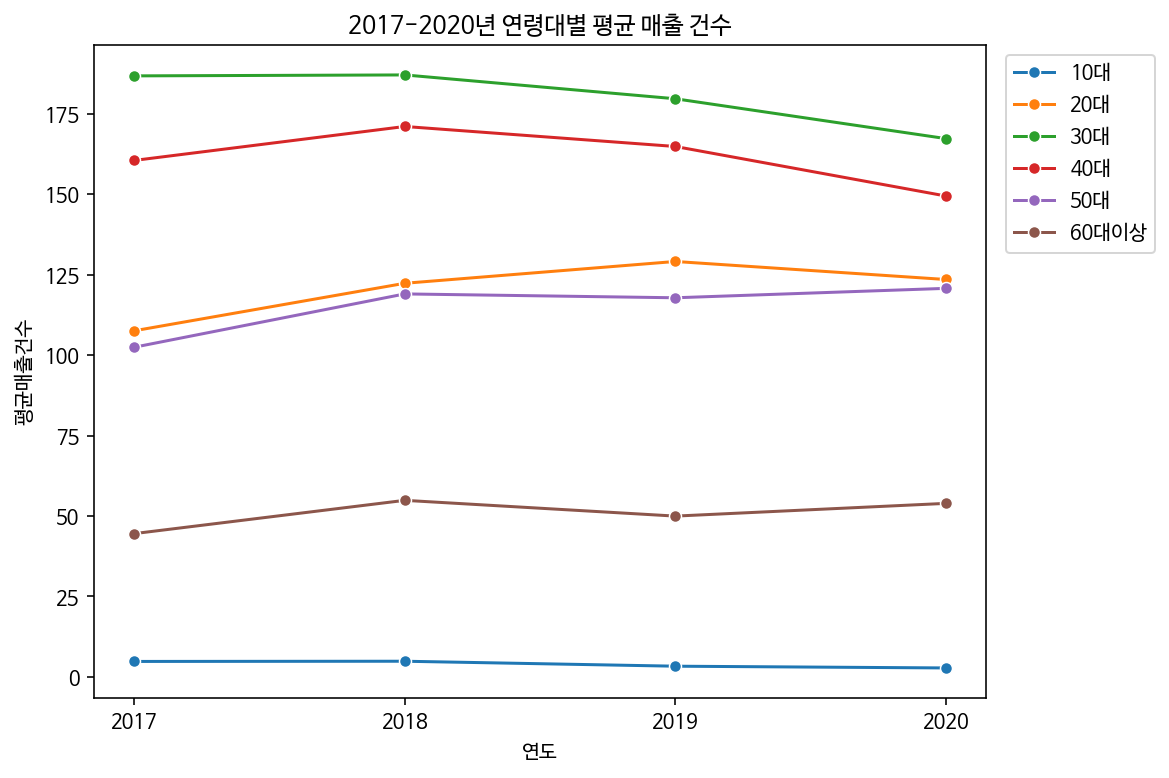

In [16]:
plt.figure(figsize=(8,6))
sns.lineplot(x='기준_년_코드',y='10대_평균매출건수',data=temp_sum, marker='o',label='10대')
sns.lineplot(x='기준_년_코드',y='20대_평균매출건수',data=temp_sum, marker='o',label='20대')
sns.lineplot(x='기준_년_코드',y='30대_평균매출건수',data=temp_sum, marker='o',label='30대')
sns.lineplot(x='기준_년_코드',y='40대_평균매출건수',data=temp_sum, marker='o',label='40대')
sns.lineplot(x='기준_년_코드',y='50대_평균매출건수',data=temp_sum, marker='o',label='50대')
sns.lineplot(x='기준_년_코드',y='60대이상_평균매출건수',data=temp_sum, marker='o',label='60대이상')
plt.xlabel('연도')
plt.ylabel('평균매출건수')
plt.title('2017-2020년 연령대별 평균 매출 건수')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

In [17]:
#molan.to_csv('서울시_세탁소추정매출_1920.csv',encoding='cp949')

In [47]:
molan_1=molan[['기준_년_코드','기준_분기_코드','상권_구분_코드_명','상권_코드_명','분기당_매출_금액','분기당_매출_건수','점포수']]
molan_1.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명,분기당_매출_금액,분기당_매출_건수,점포수
29,2016,1,골목상권,성덕정17길,55436666.0,2549,1
95,2016,1,골목상권,광나루로52길,14072427.0,633,5
107,2016,1,골목상권,응암로1길,3137437.0,129,1
124,2016,1,골목상권,동일로18길,9107626.0,640,3
191,2016,1,골목상권,면목로56길,3655567.0,240,4


In [42]:
molan_1['상권_구분_코드_명'].unique()

array(['골목상권', '전통시장', '발달상권', '관광특구'], dtype=object)

In [48]:
molan_year=molan_1.groupby(['기준_년_코드'])['분기당_매출_금액','분기당_매출_건수','점포수'].sum().reset_index()
molan_year['연별_매출_금액_평균']=molan_year['분기당_매출_금액']/molan_year['점포수']
molan_year['연별_매출_건수_평균']=molan_year['분기당_매출_건수']/molan_year['점포수']
molan_year

,기준_년_코드,분기당_매출_금액,분기당_매출_건수,점포수,연별_매출_금액_평균,연별_매출_건수_평균
0,2016,7.706122e+10,4569684,8248,9.343018e+06,554.035403
1,2017,9.016435e+10,5285746,8358,1.078779e+07,632.417564
2,2018,1.004758e+11,5679730,8254,1.217298e+07,688.118488
3,2019,9.016739e+10,5112408,7779,1.159113e+07,657.206325
4,2020,8.729756e+10,5103415,8095,1.078413e+07,630.440395


In [35]:
palette1=sns.color_palette('GnBu')
palette2=sns.color_palette('cool')


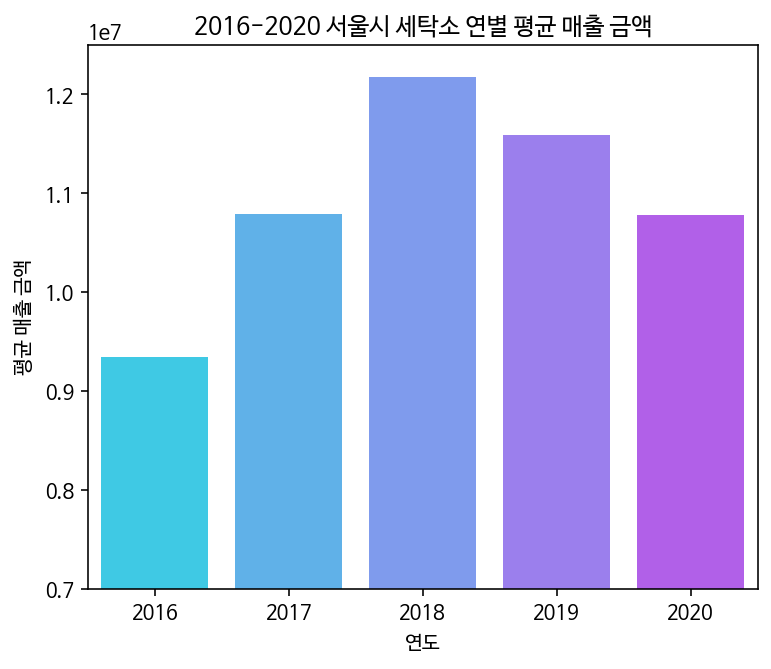

In [55]:
plt.figure(figsize=(6,5))
sns.barplot(x='기준_년_코드',y='연별_매출_금액_평균',data=molan_year,palette=palette2)
plt.xlabel('연도')
plt.ylabel('평균 매출 금액')
plt.ylim((0.7e+07,1.25e+07))
plt.title('2016-2020 서울시 세탁소 연별 평균 매출 금액')
plt.show()

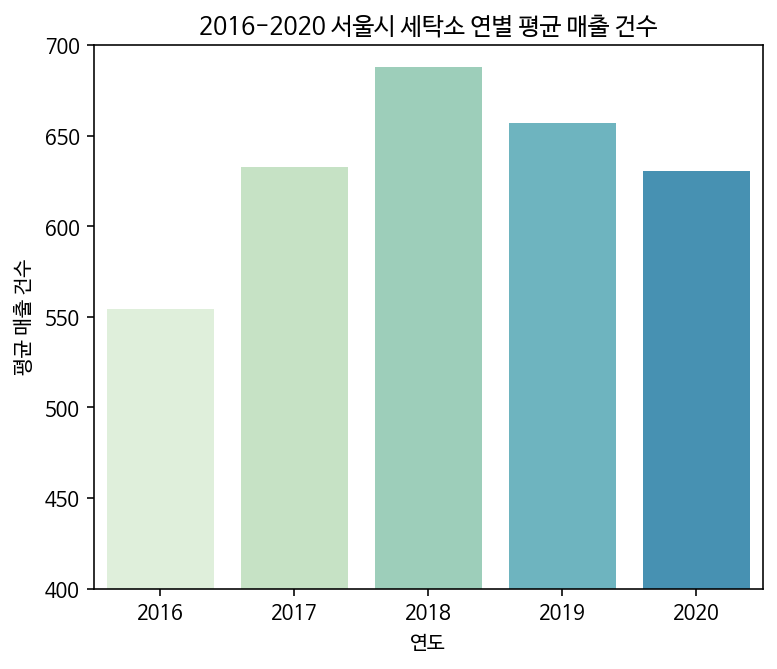

In [56]:
plt.figure(figsize=(6,5))
sns.barplot(x='기준_년_코드',y='연별_매출_건수_평균',data=molan_year,palette=palette1)
plt.xlabel('연도')
plt.ylabel('평균 매출 건수')
plt.ylim((400,700))
plt.title('2016-2020 서울시 세탁소 연별 평균 매출 건수')
plt.show()

In [51]:
molan1620=molan_1.groupby(['기준_년_코드','기준_분기_코드'])['분기당_매출_금액','분기당_매출_건수','점포수'].sum().reset_index()
molan1620

,기준_년_코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,점포수
0,2016,1,1.705713e+10,1031393,2025
1,2016,2,2.392771e+10,1276860,2064
2,2016,3,1.452329e+10,955885,2071
3,2016,4,2.155310e+10,1305546,2088
4,2017,1,2.004641e+10,1229377,2078
5,2017,2,2.843741e+10,1512421,2091
6,2017,3,1.841420e+10,1191453,2093
7,2017,4,2.326632e+10,1352495,2096
8,2018,1,2.291341e+10,1308927,2073
9,2018,2,3.166604e+10,1605844,2086


In [52]:
molan1620['연도_분기'] =molan1620[['기준_년_코드','기준_분기_코드']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
molan1620

,기준_년_코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,점포수,연도_분기
0,2016,1,1.705713e+10,1031393,2025,2016_1
1,2016,2,2.392771e+10,1276860,2064,2016_2
2,2016,3,1.452329e+10,955885,2071,2016_3
3,2016,4,2.155310e+10,1305546,2088,2016_4
4,2017,1,2.004641e+10,1229377,2078,2017_1
5,2017,2,2.843741e+10,1512421,2091,2017_2
6,2017,3,1.841420e+10,1191453,2093,2017_3
7,2017,4,2.326632e+10,1352495,2096,2017_4
8,2018,1,2.291341e+10,1308927,2073,2018_1
9,2018,2,3.166604e+10,1605844,2086,2018_2


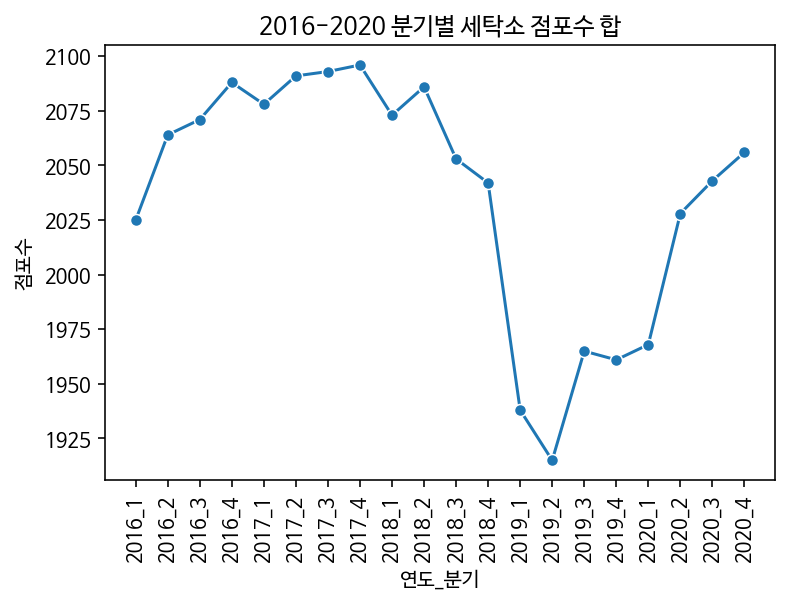

In [54]:
plt.figure()
sns.lineplot(x='연도_분기',y='점포수',data=molan1620, palette='PuBu',marker='o')
plt.xticks(rotation=90)
plt.title('2016-2020 분기별 세탁소 점포수 합')
plt.show()

In [64]:
molan1920['분기당_매출_금액_평균']=molan1920['분기당_매출_금액']/molan1920['점포수']
molan1920['분기당_매출_건수_평균']=molan1920['분기당_매출_건수']/molan1920['점포수']
temp_ml=molan1920
molan1920

,기준_년_코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,점포수,분기당_매출_금액_평균,분기당_매출_건수_평균,연도_분기
0,2019,1,2.092603e+10,1189961,1938,1.079775e+07,614.014964,2019_1
1,2019,2,2.723287e+10,1357134,1915,1.422082e+07,708.686162,2019_2
2,2019,3,1.818013e+10,1153808,1965,9.251977e+06,587.179644,2019_3
3,2019,4,2.382835e+10,1411505,1961,1.215112e+07,719.788373,2019_4
4,2020,1,2.015540e+10,1167561,1968,1.024157e+07,593.272866,2020_1
5,2020,2,2.784318e+10,1427683,2028,1.372938e+07,703.985700,2020_2
6,2020,3,1.685087e+10,1165985,2043,8.248102e+06,570.721977,2020_3
7,2020,4,2.244811e+10,1342186,2056,1.091834e+07,652.814202,2020_4


In [73]:
#sns.set_palette("pastel")
#plt.figure()
#sns.barplot(x='연도_분기',y='분기당_매출_금액',data=temp_ml)
#plt.xticks(rotation=90)
#plt.show()

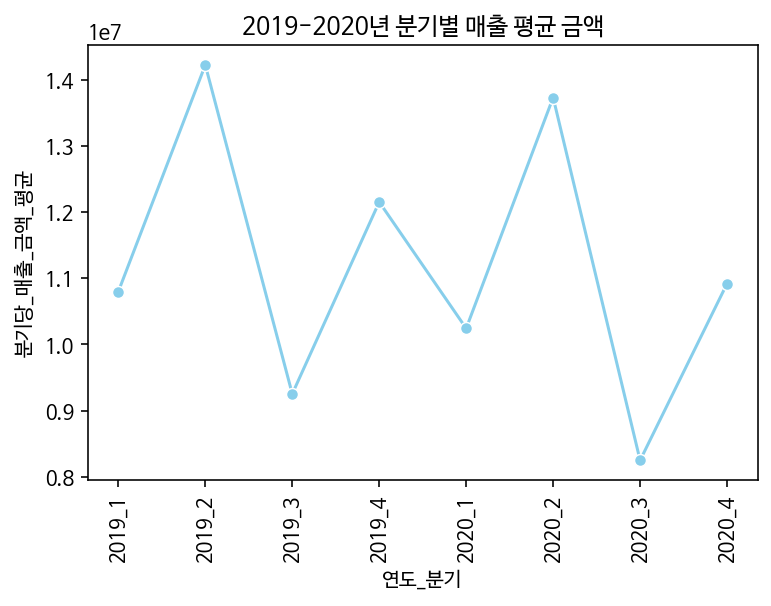

In [42]:
plt.figure()
sns.lineplot(x='연도_분기',y='분기당_매출_금액_평균',data=temp_ml,linestyle='-', color='skyblue', marker='o')
plt.xticks(rotation=90)
plt.title('2019-2020년 분기별 매출 평균 금액')
plt.show()

In [72]:
#plt.figure()
#sns.barplot(x='연도_분기',y='분기당_매출_건수_평균',data=temp_ml)
#plt.xticks(rotation=90)
#plt.show()

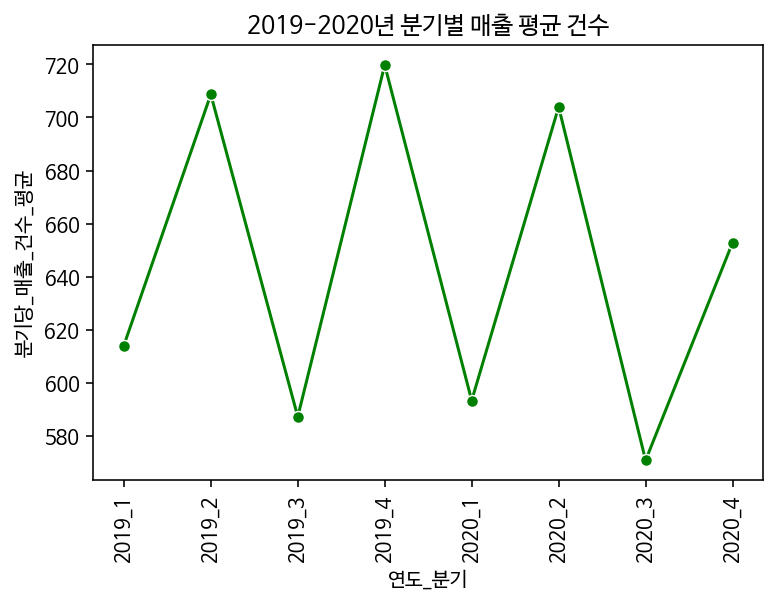

In [70]:
plt.figure()
sns.lineplot(x='연도_분기',y='분기당_매출_건수_평균',data=temp_ml,color='green', marker='o')
plt.xticks(rotation=90)
plt.title('2019-2020년 분기별 매출 평균 건수')
plt.show()

In [9]:
molan19_all=molan19[['기준_년_코드','기준_분기_코드','상권_구분_코드_명','상권_코드_명','분기당_매출_금액','분기당_매출_건수','점포수']]
molan19_all.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명,분기당_매출_금액,분기당_매출_건수,점포수
123,2019,1,골목상권,퇴계로56길,12234401,531,2
124,2019,1,골목상권,동일로242길,15219048,1053,3
185,2019,1,골목상권,후암로28길,32036855,1319,2
233,2019,1,골목상권,부일로11길,16681915,887,1
271,2019,1,골목상권,능동로13길,120599144,32833,5


In [18]:
summ_19=molan19_all.groupby(['기준_년_코드','기준_분기_코드'])['분기당_매출_금액','분기당_매출_건수','점포수'].sum().reset_index()
summ_19['분기당_매출_금액_평균']=summ_19['분기당_매출_금액']/summ_19['점포수']
summ_19['분기당_매출_건수_평균']=summ_19['분기당_매출_건수']/summ_19['점포수']
summ_19['기준_분기_코드']=summ_19['기준_분기_코드'].astype('str')
summ_19

,기준_년_코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,점포수,분기당_매출_금액_평균,분기당_매출_건수_평균
0,2019,1,20926031075,1189961,1938,1.079775e+07,614.014964
1,2019,2,27232871801,1357134,1915,1.422082e+07,708.686162
2,2019,3,18180134554,1153808,1965,9.251977e+06,587.179644
3,2019,4,23828347629,1411505,1961,1.215112e+07,719.788373


In [10]:
molan20_all=molan20[['기준_년_코드','기준_분기_코드','상권_구분_코드_명','상권_코드_명','분기당_매출_금액','분기당_매출_건수','점포수']]
molan20_all.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명,분기당_매출_금액,분기당_매출_건수,점포수
42,2020,3,골목상권,삼선교로10길,101699.0,16,3
71,2020,1,골목상권,돈화문로11가길,28516491.0,2250,1
157,2020,1,골목상권,명륜길,10765847.0,1062,4
193,2020,1,골목상권,북촌로5길,3703105.0,157,1
287,2020,1,골목상권,율곡로10길,754564.0,15,3


In [17]:
summ_20=molan20_all.groupby(['기준_년_코드','기준_분기_코드'])['분기당_매출_금액','분기당_매출_건수','점포수'].sum().reset_index()
summ_20['분기당_매출_금액_평균']=summ_20['분기당_매출_금액']/summ_20['점포수']
summ_20['분기당_매출_건수_평균']=summ_20['분기당_매출_건수']/summ_20['점포수']
summ_20['기준_분기_코드']=summ_20['기준_분기_코드'].astype('str')
summ_20

,기준_년_코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,점포수,분기당_매출_금액_평균,분기당_매출_건수_평균
0,2020,1,2.015540e+10,1167561,1968,1.024157e+07,593.272866
1,2020,2,2.784318e+10,1427683,2028,1.372938e+07,703.985700
2,2020,3,1.685087e+10,1165985,2043,8.248102e+06,570.721977
3,2020,4,2.244811e+10,1342186,2056,1.091834e+07,652.814202


In [39]:
summ_17=molan17_all.groupby(['기준_년_코드','기준_분기_코드'])['분기당_매출_금액','분기당_매출_건수','점포수'].sum().reset_index()
summ_17['분기당_매출_금액_평균']=summ_17['분기당_매출_금액']/summ_17['점포수']
summ_17['분기당_매출_건수_평균']=summ_17['분기당_매출_건수']/summ_17['점포수']
summ_17['기준_분기_코드']=summ_17['기준_분기_코드'].astype('str')
summ_17

,기준_년_코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,점포수,분기당_매출_금액_평균,분기당_매출_건수_평균
0,2017,1,20046412600,1229377,2078,9.646974e+06,591.615496
1,2017,2,28437411959,1512421,2091,1.359991e+07,723.300335
2,2017,3,18414199601,1191453,2093,8.797993e+06,569.256092
3,2017,4,23266324730,1352495,2096,1.110035e+07,645.274332


In [40]:
summ_18=molan18_all.groupby(['기준_년_코드','기준_분기_코드'])['분기당_매출_금액','분기당_매출_건수','점포수'].sum().reset_index()
summ_18['분기당_매출_금액_평균']=summ_18['분기당_매출_금액']/summ_18['점포수']
summ_18['분기당_매출_건수_평균']=summ_18['분기당_매출_건수']/summ_18['점포수']
summ_18['기준_분기_코드']=summ_18['기준_분기_코드'].astype('str')
summ_18

,기준_년_코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,점포수,분기당_매출_금액_평균,분기당_매출_건수_평균
0,2018,1,22913409370,1308927,2073,1.105326e+07,631.416787
1,2018,2,31666044028,1605844,2086,1.518027e+07,769.819751
2,2018,3,18820939950,1198170,2053,9.167530e+06,583.619094
3,2018,4,27075382889,1566789,2042,1.325925e+07,767.281587


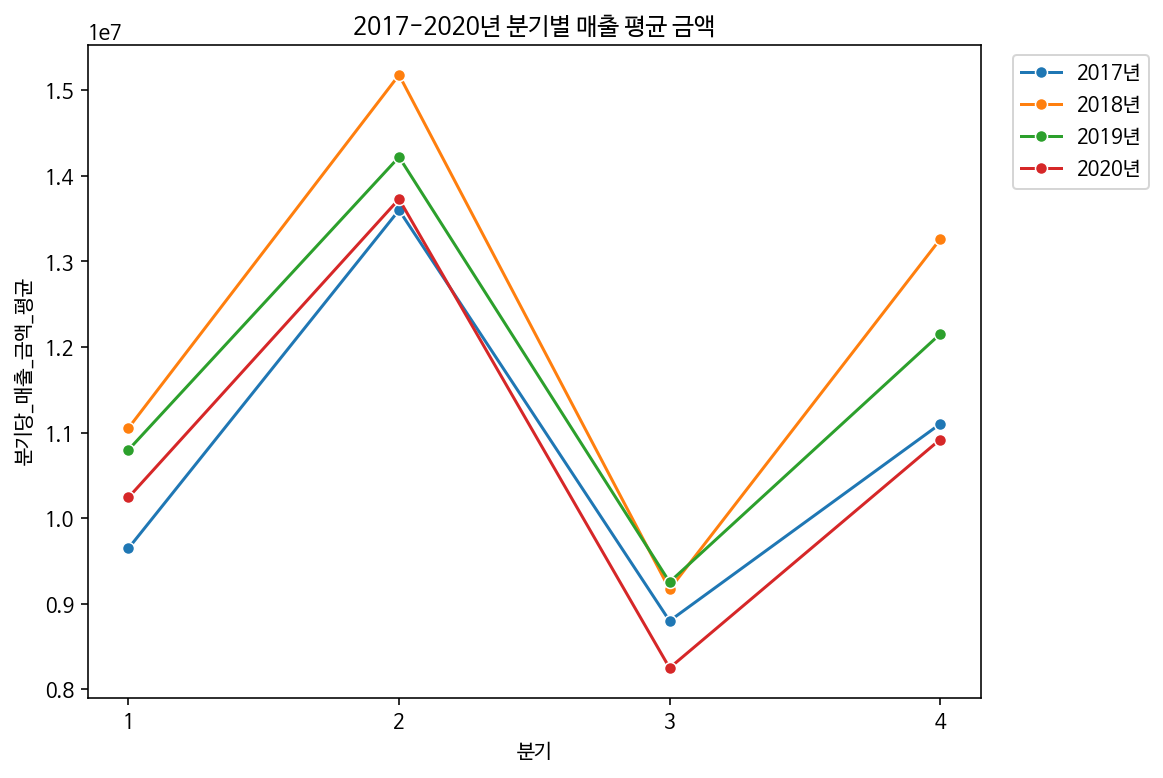

In [77]:
plt.figure(figsize=(8,6))
sns.lineplot(x='기준_분기_코드',y='분기당_매출_금액_평균',data=summ_17, marker='o',label='2017년')
sns.lineplot(x='기준_분기_코드',y='분기당_매출_금액_평균',data=summ_18, marker='o',label='2018년')
sns.lineplot(x='기준_분기_코드',y='분기당_매출_금액_평균',data=summ_19, marker='o',label='2019년')
sns.lineplot(x='기준_분기_코드',y='분기당_매출_금액_평균',data=summ_20, marker='o',label='2020년')
plt.xlabel('분기')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.title('2017-2020년 분기별 매출 평균 금액')
plt.show()

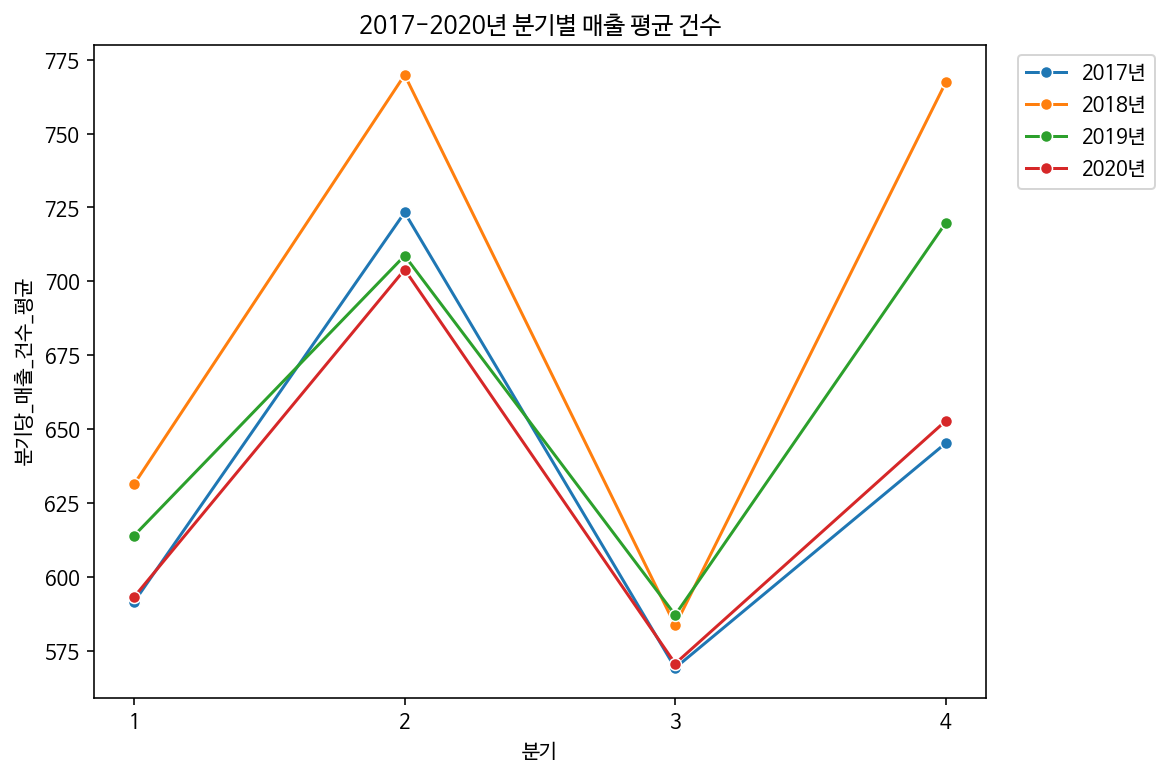

In [78]:
plt.figure(figsize=(8,6))
sns.lineplot(x='기준_분기_코드',y='분기당_매출_건수_평균',data=summ_17, marker='o',label='2017년')
sns.lineplot(x='기준_분기_코드',y='분기당_매출_건수_평균',data=summ_18, marker='o',label='2018년')
sns.lineplot(x='기준_분기_코드',y='분기당_매출_건수_평균',data=summ_19, marker='o',label='2019년')
sns.lineplot(x='기준_분기_코드',y='분기당_매출_건수_평균',data=summ_20, marker='o',label='2020년')
plt.xlabel('분기')
plt.title('2017-2020년 분기별 매출 평균 건수')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

# 국가통계포털 세탁업체 매출액 추이 시각화

#### 데이터 출처
https://kosis.kr/statHtml/statHtml.do?orgId=117&tblId=TX_117430022&vw_cd=MT_ZTITLE&list_id=F_15&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [20]:
from pandas import Series, DataFrame
raw_data = {'년도': [2016,2017,2018,2019],
            '총 매출액':[1719056,1802933,1936004,1942191],
            '50 백만원 미만':[210313,187750,331325,244881],
            '50-100 백만원':[275492,261649,287003,160149],
            '100-500 백만원':[641704,697836,524639,485921],
            '500-1000백만원':[187815,152920,302455,263850],
            '1000-5000백만원':[312502,418640,383467,634798],
            '5000-10000백만원':[49728,40984,36157,82009]}
sales = DataFrame(raw_data)
sales['년도']=sales['년도'].astype('str')
sales

,년도,총 매출액,50 백만원 미만,50-100 백만원,100-500 백만원,500-1000백만원,1000-5000백만원,5000-10000백만원
0,2016,1719056,210313,275492,641704,187815,312502,49728
1,2017,1802933,187750,261649,697836,152920,418640,40984
2,2018,1936004,331325,287003,524639,302455,383467,36157
3,2019,1942191,244881,160149,485921,263850,634798,82009


In [49]:
sale_temp=sales
sale_temp['500 백만원 미만']=sale_temp['50 백만원 미만']+sale_temp['50-100 백만원']+sale_temp['100-500 백만원']
sale_temp['500 백만원 이상']=sale_temp['500-1000백만원']+sale_temp['1000-5000백만원']+sale_temp['5000-10000백만원']
sale_temp

,년도,총 매출액,50 백만원 미만,50-100 백만원,100-500 백만원,500-1000백만원,1000-5000백만원,5000-10000백만원,500 백만원 미만,500-10000백만원,500 백만원 이상
0,2016,1719056,210313,275492,641704,187815,312502,49728,1127509,550045,550045
1,2017,1802933,187750,261649,697836,152920,418640,40984,1147235,612544,612544
2,2018,1936004,331325,287003,524639,302455,383467,36157,1142967,722079,722079
3,2019,1942191,244881,160149,485921,263850,634798,82009,890951,980657,980657


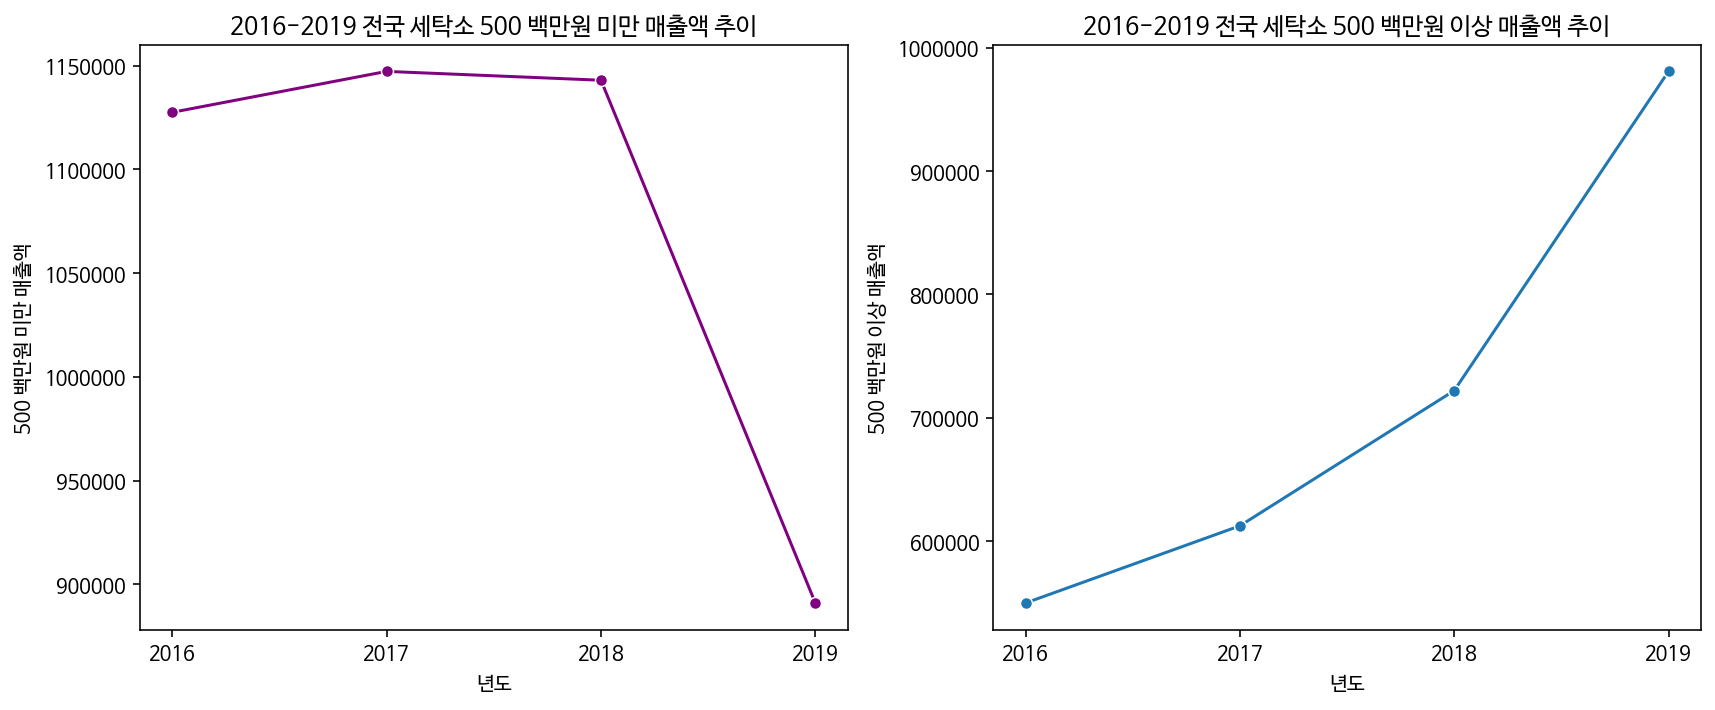

In [61]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.lineplot(x='년도',y='500 백만원 미만',data=sale_temp, color='purple',marker='o')
plt.ylabel('500 백만원 미만 매출액')
plt.title('2016-2019 전국 세탁소 500 백만원 미만 매출액 추이')

plt.subplot(1,2,2)
sns.lineplot(x='년도',y='500 백만원 이상',data=sale_temp,marker='o')
plt.ylabel('500 백만원 이상 매출액')
plt.title('2016-2019 전국 세탁소 500 백만원 이상 매출액 추이')
plt.tight_layout()
plt.show()